# WeatherPy

## Analysis:
* Temp near the equator is significantly higher as expected.
* Temperatures in the +ve latitudes i.e., the northern hemisphere looks significantly warmer than the southern hemisphere. Could be due to time of the year -summer.
* There is a cloudiness grouping in the latitudes: 0, 20, 70 and 90, need to look deeper into the reasons.
* Wind speed is scattered all around, does not point to any trends.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import openweathermapy.core as owm
import logging
import logging.config
import time

In [79]:
from pprint import pprint
from citipy import citipy
from config import api_key
from datetime import datetime

### Randomly select 500 cities
#Generate 500 random latitudes and longitudes to get the 500 cities to cover the entire world.

In [80]:
lats = np.random.randint(-90, 90, size=1500)
longs = np.random.randint(-180, 180, size=1500)
#print(type(lats))
#type(longs)

In [81]:
cities = []
for x in range(1200):
    #print(f"{lats[x]},{longs[x]}")
    city = citipy.nearest_city(lats[x],longs[x])
    if(city not in cities):
        #print("Adding City = " + city.city_name)
        cities.append(city)
print(f"NUMBER = {len(cities)}")

NUMBER = 543


### Get the weather details for the cities


In [82]:
# create logger
logging.config.fileConfig('logging.conf')
logger = logging.getLogger('WeatherPy')
logger.setLevel(logging.DEBUG)

In [83]:
#settings = {"units": "metric", "appid": api_key}
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

### Using APIs to get the following
* Temperature
* Humidity
* Cloudiness
* Wind Speed
* Latitude
* Longitude
* Temperature High

In [84]:
city_name_list = []
country_name_list = []
lat_list = []
long_list = []
tempHigh_list = []
temerature_list = []
humidity_list = []
cloudiness_list = []
windSpeed_list = []
date_list = []

In [85]:
# 'application' code
logger.info('Beginning Data Retrieval')
logger.info('--------------------------------')

for x in range(len(cities)):
    logger.info(f"Processing Record {x} | {cities[x].city_name},{cities[x].country_code}")
    query_url = f"{url}{cities[x].city_name},{cities[x].country_code}"
    #query_url = f"{url}belushya guba,ru"
    city_sample_list_500.append(cities[x])
    try:
        resp = requests.get(query_url).json()
        #pprint(resp)
        temerature_list.append(resp['main']['temp'])
        tempHigh_list.append(resp['main']['temp_max'])
        humidity_list.append(resp['main']['humidity'])
        cloudiness_list.append(resp['clouds']['all'])
        windSpeed_list.append(resp['wind']['speed'])
        lat_list.append(resp['coord']['lat'])
        long_list.append(resp['coord']['lon'])
        city_name_list.append(resp['name'])
        date_list.append(resp['dt'])
        country_name_list.append(resp['sys']['country'])
    except KeyError:
        logger.info(f"{resp['message']}, skipping to next city | {cities[x].city_name},{cities[x].country_code}")

'06/11/2018 03:45:18 AM' - WeatherPy - INFO - Beginning Data Retrieval
'06/11/2018 03:45:18 AM' - WeatherPy - INFO - --------------------------------
'06/11/2018 03:45:18 AM' - WeatherPy - INFO - Processing Record 0 | obluche,ru
'06/11/2018 03:45:18 AM' - WeatherPy - INFO - city not found, skipping to next city | obluche,ru
'06/11/2018 03:45:18 AM' - WeatherPy - INFO - Processing Record 1 | port alfred,za
'06/11/2018 03:45:19 AM' - WeatherPy - INFO - Processing Record 2 | georgetown,sh
'06/11/2018 03:45:19 AM' - WeatherPy - INFO - Processing Record 3 | benghazi,ly
'06/11/2018 03:45:19 AM' - WeatherPy - INFO - Processing Record 4 | kapaa,us
'06/11/2018 03:45:19 AM' - WeatherPy - INFO - Processing Record 5 | rockhampton,au
'06/11/2018 03:45:19 AM' - WeatherPy - INFO - Processing Record 6 | husavik,is
'06/11/2018 03:45:20 AM' - WeatherPy - INFO - Processing Record 7 | rio gallegos,ar
'06/11/2018 03:45:20 AM' - WeatherPy - INFO - Processing Record 8 | amderma,ru
'06/11/2018 03:45:20 AM' - 

'06/11/2018 03:45:36 AM' - WeatherPy - INFO - Processing Record 85 | bilibino,ru
'06/11/2018 03:45:37 AM' - WeatherPy - INFO - Processing Record 86 | bambanglipuro,id
'06/11/2018 03:45:38 AM' - WeatherPy - INFO - Processing Record 87 | bluff,nz
'06/11/2018 03:45:38 AM' - WeatherPy - INFO - Processing Record 88 | atuona,pf
'06/11/2018 03:45:38 AM' - WeatherPy - INFO - Processing Record 89 | mvuma,zw
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - Processing Record 90 | vardo,no
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - Processing Record 91 | opobo,ng
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - city not found, skipping to next city | opobo,ng
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - Processing Record 92 | mahebourg,mu
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - Processing Record 93 | evensk,ru
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - Processing Record 94 | rungata,ki
'06/11/2018 03:45:39 AM' - WeatherPy - INFO - city not found, skipping to next city | rungata,ki
'06/11/20

'06/11/2018 03:45:54 AM' - WeatherPy - INFO - city not found, skipping to next city | marcona,pe
'06/11/2018 03:45:54 AM' - WeatherPy - INFO - Processing Record 168 | marsa matruh,eg
'06/11/2018 03:45:54 AM' - WeatherPy - INFO - Processing Record 169 | stranraer,gb
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - Processing Record 170 | tuy hoa,vn
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - Processing Record 171 | kidal,ml
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - Processing Record 172 | pevek,ru
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - Processing Record 173 | samusu,ws
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - city not found, skipping to next city | samusu,ws
'06/11/2018 03:45:55 AM' - WeatherPy - INFO - Processing Record 174 | banda aceh,id
'06/11/2018 03:45:56 AM' - WeatherPy - INFO - Processing Record 175 | guerrero negro,mx
'06/11/2018 03:45:56 AM' - WeatherPy - INFO - Processing Record 176 | acarau,br
'06/11/2018 03:45:56 AM' - WeatherPy - INFO - city not found, skipp

'06/11/2018 03:46:12 AM' - WeatherPy - INFO - Processing Record 255 | iquique,cl
'06/11/2018 03:46:12 AM' - WeatherPy - INFO - Processing Record 256 | kuching,my
'06/11/2018 03:46:13 AM' - WeatherPy - INFO - Processing Record 257 | sergeyevka,kz
'06/11/2018 03:46:13 AM' - WeatherPy - INFO - Processing Record 258 | kavieng,pg
'06/11/2018 03:46:13 AM' - WeatherPy - INFO - Processing Record 259 | copperas cove,us
'06/11/2018 03:46:13 AM' - WeatherPy - INFO - Processing Record 260 | cochrane,ca
'06/11/2018 03:46:13 AM' - WeatherPy - INFO - Processing Record 261 | chiang klang,th
'06/11/2018 03:46:14 AM' - WeatherPy - INFO - Processing Record 262 | esperance,au
'06/11/2018 03:46:14 AM' - WeatherPy - INFO - Processing Record 263 | isabela,us
'06/11/2018 03:46:14 AM' - WeatherPy - INFO - city not found, skipping to next city | isabela,us
'06/11/2018 03:46:14 AM' - WeatherPy - INFO - Processing Record 264 | yabrud,sy
'06/11/2018 03:46:14 AM' - WeatherPy - INFO - Processing Record 265 | usinsk,

'06/11/2018 03:46:31 AM' - WeatherPy - INFO - Processing Record 344 | nemuro,jp
'06/11/2018 03:46:31 AM' - WeatherPy - INFO - Processing Record 345 | acari,pe
'06/11/2018 03:46:31 AM' - WeatherPy - INFO - Processing Record 346 | yatou,cn
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - Processing Record 347 | linjiang,cn
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - Processing Record 348 | longlac,ca
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - city not found, skipping to next city | longlac,ca
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - Processing Record 349 | aljezur,pt
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - Processing Record 350 | muhos,fi
'06/11/2018 03:46:32 AM' - WeatherPy - INFO - Processing Record 351 | los llanos de aridane,es
'06/11/2018 03:46:33 AM' - WeatherPy - INFO - Processing Record 352 | lakshmipur,bd
'06/11/2018 03:46:33 AM' - WeatherPy - INFO - Processing Record 353 | imbituba,br
'06/11/2018 03:46:33 AM' - WeatherPy - INFO - Processing Record 354 | dunedin,nz


'06/11/2018 03:46:50 AM' - WeatherPy - INFO - Processing Record 426 | namatanai,pg
'06/11/2018 03:46:50 AM' - WeatherPy - INFO - Processing Record 427 | tuggurt,dz
'06/11/2018 03:46:50 AM' - WeatherPy - INFO - city not found, skipping to next city | tuggurt,dz
'06/11/2018 03:46:50 AM' - WeatherPy - INFO - Processing Record 428 | aransas pass,us
'06/11/2018 03:46:51 AM' - WeatherPy - INFO - Processing Record 429 | wanning,cn
'06/11/2018 03:46:51 AM' - WeatherPy - INFO - Processing Record 430 | sola,vu
'06/11/2018 03:46:51 AM' - WeatherPy - INFO - Processing Record 431 | nicoya,cr
'06/11/2018 03:46:51 AM' - WeatherPy - INFO - Processing Record 432 | kichera,ru
'06/11/2018 03:46:51 AM' - WeatherPy - INFO - Processing Record 433 | sao borja,br
'06/11/2018 03:46:52 AM' - WeatherPy - INFO - Processing Record 434 | aswan,eg
'06/11/2018 03:46:52 AM' - WeatherPy - INFO - Processing Record 435 | yangliuqing,cn
'06/11/2018 03:46:52 AM' - WeatherPy - INFO - Processing Record 436 | smolensk,ru
'06/

'06/11/2018 03:47:09 AM' - WeatherPy - INFO - Processing Record 516 | manitouwadge,ca
'06/11/2018 03:47:09 AM' - WeatherPy - INFO - Processing Record 517 | coari,br
'06/11/2018 03:47:09 AM' - WeatherPy - INFO - Processing Record 518 | batagay-alyta,ru
'06/11/2018 03:47:10 AM' - WeatherPy - INFO - Processing Record 519 | maningrida,au
'06/11/2018 03:47:10 AM' - WeatherPy - INFO - Processing Record 520 | el rosario,sv
'06/11/2018 03:47:10 AM' - WeatherPy - INFO - Processing Record 521 | chapais,ca
'06/11/2018 03:47:10 AM' - WeatherPy - INFO - Processing Record 522 | sovetskiy,ru
'06/11/2018 03:47:11 AM' - WeatherPy - INFO - Processing Record 523 | shimanovsk,ru
'06/11/2018 03:47:11 AM' - WeatherPy - INFO - Processing Record 524 | brunico,it
'06/11/2018 03:47:11 AM' - WeatherPy - INFO - Processing Record 525 | birao,cf
'06/11/2018 03:47:11 AM' - WeatherPy - INFO - Processing Record 526 | drochia,md
'06/11/2018 03:47:11 AM' - WeatherPy - INFO - Processing Record 527 | medea,dz
'06/11/2018 

In [86]:
print(len(city_name_list))
print(len(country_name_list))
print(len(lat_list))
print(len(long_list))
print(len(tempHigh_list))
print(len(temerature_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windSpeed_list))
print(len(date_list))

471
471
471
471
471
471
471
471
471
471


In [87]:
columns = ['City','Cloudiness','Country','Date','Humidity','Lat', 'Log', 'Max Temp', 'Wind Speed']
city_weather_df = pd.DataFrame({'City':city_name_list,
                          'Cloudiness':cloudiness_list,
                          'Country':country_name_list,
                          'Date':date_list,
                          'Humidity':humidity_list,
                          'Lat':lat_list, 
                          'Log':long_list, 
                          'Max Temp':tempHigh_list, 
                          'Wind Speed':windSpeed_list
                         },columns=columns)

In [88]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Log,Max Temp,Wind Speed
0,Port Alfred,0,ZA,1528703118,88,-33.59,26.89,63.40,4.50
1,Georgetown,0,SH,1528703119,100,-7.93,-14.42,78.25,12.77
2,Benghazi,40,LY,1528700400,65,32.12,20.07,77.00,17.22
3,Kapaa,90,US,1528700160,88,22.08,-159.32,75.20,12.75
4,Rockhampton,90,AU,1528700400,64,-23.38,150.51,73.40,6.93


### Temperature (F) vs. Latitude

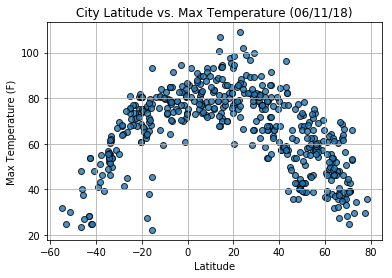

In [95]:
# generating the plot
plt.scatter(lat_list, 
            tempHigh_list,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# title , X, Y labels
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig('TempVsLatitude.png')

plt.show()

### Humidity (%) vs. Latitude

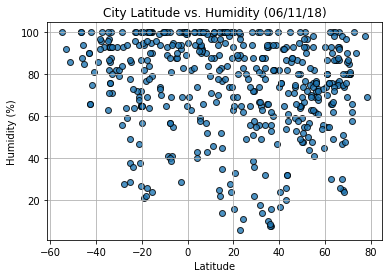

In [96]:
# generate the scatter plot
plt.scatter(lat_list, 
            humidity_list,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Title, X and Y labels
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig('HumidityVsLatitude.png')

plt.show()

### Cloudiness (%) vs. Latitude

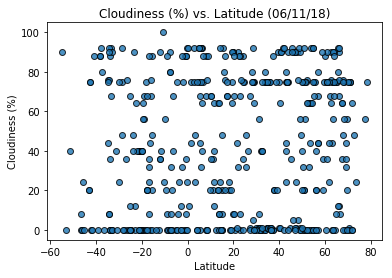

In [97]:
# generate the plot
plt.scatter(lat_list, 
            cloudiness_list, 
            edgecolors='black', marker='o', linewidths=1, 
            alpha=0.8, label='Cities')

# title, X and Y labels
plt.title(f"Cloudiness (%) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#save to file
plt.savefig('CloudinessVsLatitude.png')

plt.show()


### Wind Speed (mph) vs. Latitude

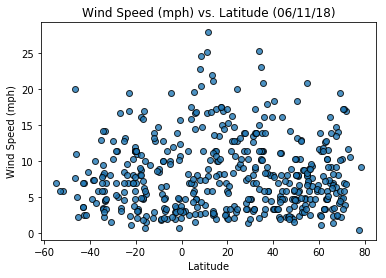

In [98]:
# generate the plot
plt.scatter(lat_list, 
            windSpeed_list, 
            edgecolors='black', marker='o', linewidths=1, 
            alpha=0.8, label='Cities')

# title, X and Y labels
plt.title(f"Wind Speed (mph) vs. Latitude ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#save to file
plt.savefig('WindSpeedVsLatitude.png')

plt.show()